In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Loading Data

In [7]:
train_data = pd.read_csv("train.csv")
train_data.shape

(42000, 785)

In [8]:
test_data = pd.read_csv("test.csv")
test_data.shape

(28000, 784)

In [9]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train_data.isnull().sum().sum()

0

<Axes: xlabel='label', ylabel='count'>

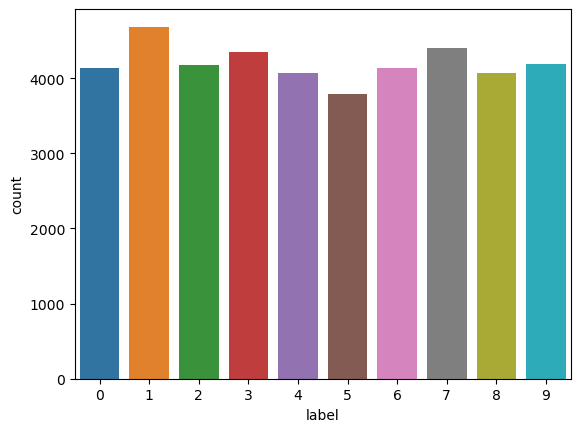

In [12]:
plt.figure()
sns.countplot(x=train_data.label)

# Reshape the data
reshape to 28x28 to apply CNN

In [13]:
# drop target and then reshape remaining data
train_data_2d=train_data.drop('label', axis=1)
train_data_2d=train_data_2d.values.reshape(-1,28,28,1)

test_data_2d=test_data.values.reshape(-1,28,28,1)

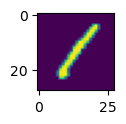

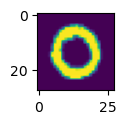

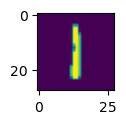

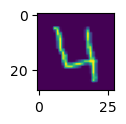

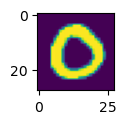

In [14]:
for i in range(5):
    plt.figure(figsize=(1,1))
    plt.imshow(train_data_2d[i])
    plt.show()

In [15]:
train_data.label[:5]

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

# Splitting Data

In [16]:
X = train_data_2d
y = train_data.label

X_test = test_data_2d

In [17]:
# Normalize the data
X = X/255.0
X_test = X_test/255.0

In [18]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [19]:
train_shape = X_train.shape
train_shape

(33600, 28, 28, 1)

In [20]:
y_train.shape

(33600,)

# Modeling

In [21]:
model = keras.Sequential([
#     CNN base
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1), padding='same'),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),
#     dense head
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [22]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

In [23]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
#     callbacks=[early_stopping],
    epochs=15,
)

Epoch 1/15
1050/1050 [==============================] - 23s 21ms/step - loss: 0.2137 - accuracy: 0.9341 - val_loss: 0.0679 - val_accuracy: 0.9792
Epoch 2/15
1050/1050 [==============================] - 24s 23ms/step - loss: 0.0618 - accuracy: 0.9801 - val_loss: 0.0530 - val_accuracy: 0.9830
Epoch 3/15
1050/1050 [==============================] - 24s 23ms/step - loss: 0.0435 - accuracy: 0.9860 - val_loss: 0.0489 - val_accuracy: 0.9861
Epoch 4/15
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0303 - accuracy: 0.9897 - val_loss: 0.0550 - val_accuracy: 0.9838
Epoch 5/15
1050/1050 [==============================] - 24s 22ms/step - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.0444 - val_accuracy: 0.9869
Epoch 6/15
1050/1050 [==============================] - 24s 23ms/step - loss: 0.0194 - accuracy: 0.9935 - val_loss: 0.0481 - val_accuracy: 0.9865
Epoch 7/15
1050/1050 [==============================] - 23s 22ms/step - loss: 0.0156 - accuracy: 0.9947 - val_loss: 0.0472 -

Best Validation Loss: 0.0444
Best Validation Accuracy: 0.9886


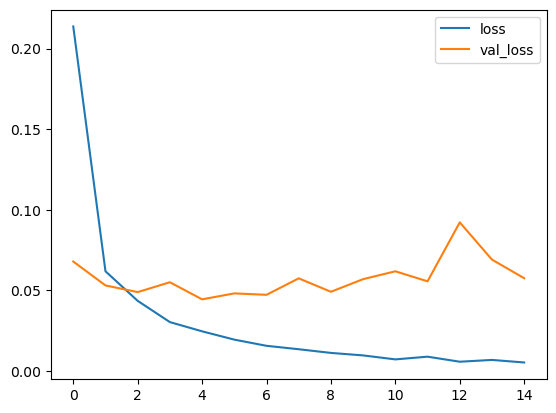

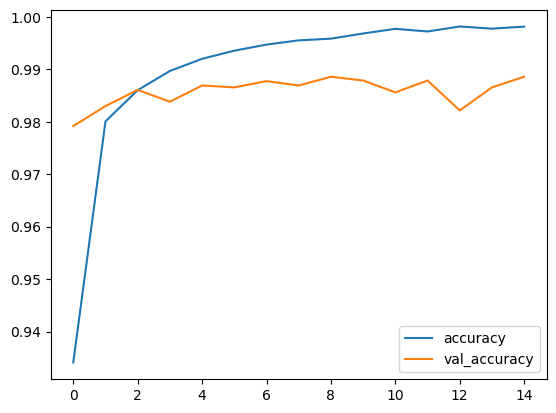

In [24]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[:,['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

# Confusion Matrix

In [25]:
pred = model.predict(X_valid)
pred_valid = pd.DataFrame([np.argmax(i) for i in pred])
cm = tf.math.confusion_matrix(labels=y_valid,predictions=pred_valid)
cm

263/263 [==============================] - 2s 7ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[809,   0,   1,   0,   0,   0,   3,   0,   0,   0],
       [  0, 958,   1,   1,   0,   0,   1,   0,   0,   0],
       [  0,   1, 857,   0,   0,   0,   0,   2,   0,   0],
       [  0,   0,   3, 853,   1,   1,   0,   3,   2,   0],
       [  1,   4,   0,   0, 816,   0,   1,   2,   1,   2],
       [  1,   0,   0,   4,   0, 743,   4,   0,   4,   0],
       [  0,   0,   0,   0,   2,   0, 838,   0,   1,   0],
       [  0,   2,   6,   1,   0,   1,   0, 888,   0,   1],
       [  0,   3,   1,   0,   0,   0,   3,   0, 760,   1],
       [  7,   1,   0,   3,   8,   4,   0,   3,   4, 782]])>

<Axes: >

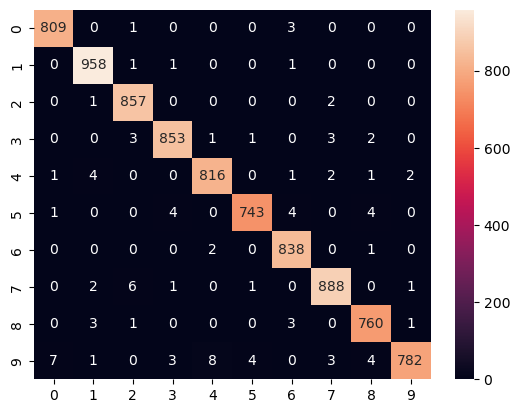

In [26]:
plt.figure()
sns.heatmap(cm, annot=True,fmt='d')

# Predictions
predictions on test data

In [27]:
preds = model.predict(X_test)
predictions = [np.argmax(i) for i in preds]
predictions = pd.Series(predictions,name="Label")

875/875 [==============================] - 6s 7ms/step


In [28]:
output = pd.concat([pd.Series(range(1,28001),name = "ImageId"),predictions],axis = 1)

output.to_csv("submission.csv",index=False)